In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import os


In [75]:
# Check if output directory exists, if not, create it
output_directory = '../Charts and Graphs Output'
os.makedirs(output_directory, exist_ok=True)


In [76]:
# Load dataset
df = pd.read_csv('../Data File Repository/Combined_Rental_Median_Price_Inventory.csv')


In [77]:
# Preprocess data: Melt and create a year column
df = df.melt(id_vars=['Borough'], var_name='Year_Rentals', value_name='Value')
df[['Year', 'Type']] = df['Year_Rentals'].str.extract('(\d{4}) (Total Rentals|Median Rent)')
df.drop('Year_Rentals', axis=1, inplace=True)
df['Year'] = pd.to_numeric(df['Year'])
df['Value'] = pd.to_numeric(df['Value'].replace('[\$,]', '', regex=True), errors='coerce')


In [78]:
# Separate into DataFrame for Total Rentals only
df_rentals = df[df['Type'] == 'Total Rentals'].drop('Type', axis=1)


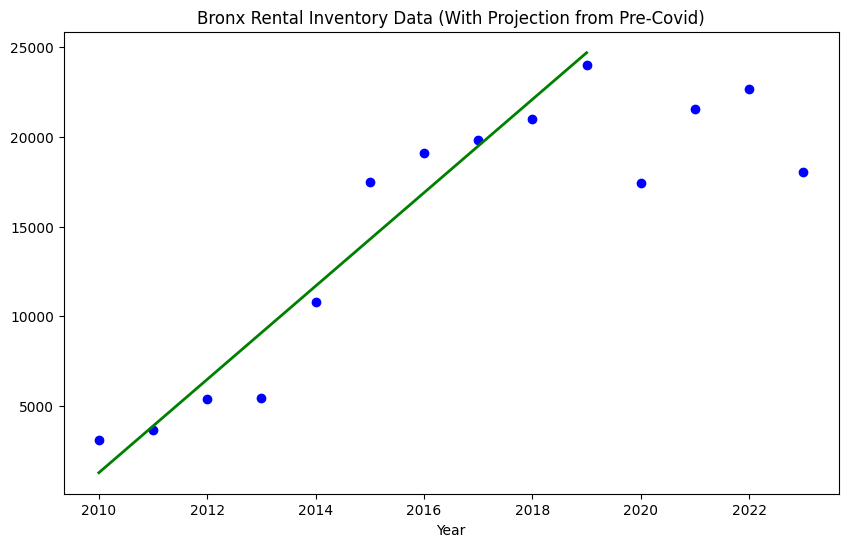

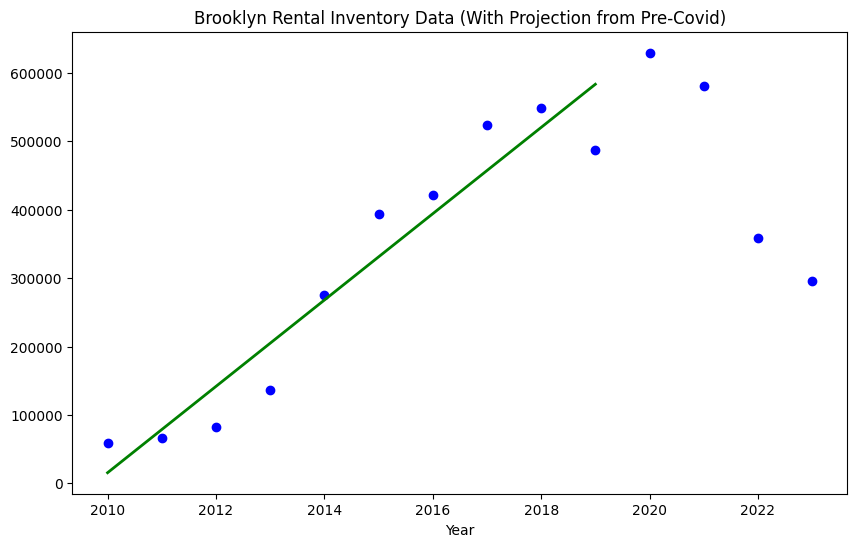

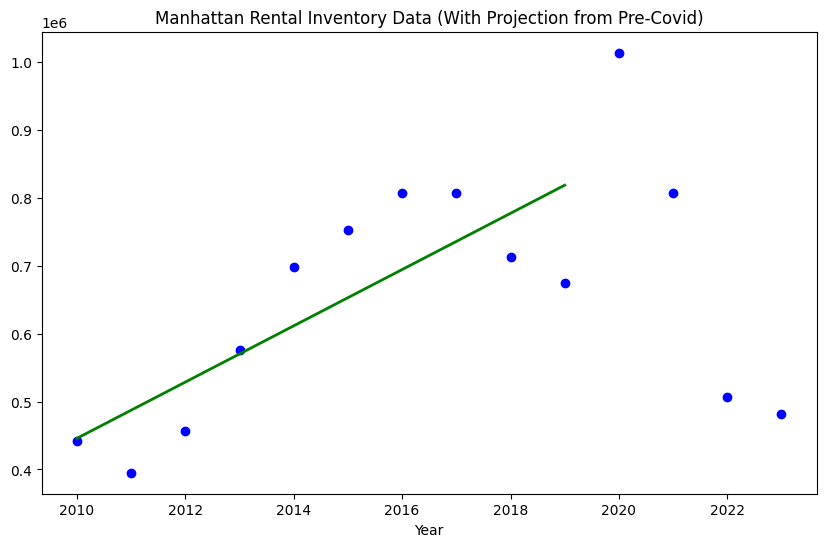

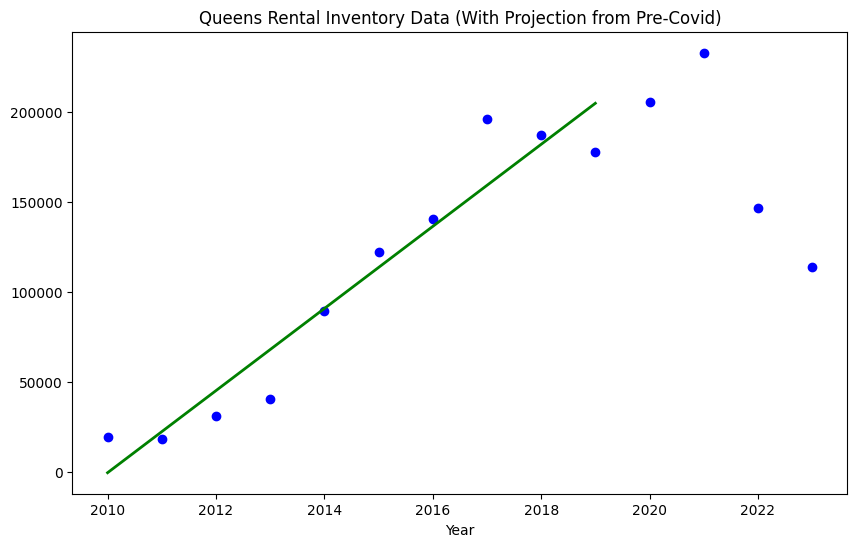

In [81]:
# Iterate over each borough to create separate charts
for borough in df['Borough'].unique():
    # Start a new figure for each borough
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Process data for Total Rentals up to 2019
    borough_rentals = df_rentals[df_rentals['Borough'] == borough]
    X = borough_rentals[borough_rentals['Year'] <= 2019][['Year']]
    y = borough_rentals[borough_rentals['Year'] <= 2019]['Value']
    model = LinearRegression().fit(X, y)
    X_predict = pd.DataFrame({'Year': range(2010, 2020)}) # Predict from 2010 to 2019 for trend line
    y_predict = model.predict(X_predict)
    
    # Plotting the trend line
    ax.plot(X_predict['Year'], y_predict, color='green', linestyle='-', linewidth=2, label='Trend (Total Rentals)')

    # Plot all actual data for Total Rentals
    ax.scatter(borough_rentals['Year'], borough_rentals['Value'], color='blue', label='Actual (Total Rentals)')

# Setting title and labels for the plot
    ax.set_title(f'{borough} Rental Inventory Data (With Projection from Pre-Covid)')
    ax.set_xlabel('Year')
    
 # Check if the borough is Manhattan and adjust y-axis accordingly
if borough == 'Manhattan':
    max_value = borough_rentals['Value'].max()
    if max_value >= 1e6:  # if the maximum value is greater than or equal to 1 million
        ax.set_ylabel('Inventory Count (Millions)')
        # Set the location of the y-ticks first
        ax.set_yticks(ax.get_yticks())
        # Then set the tick labels
        ax.set_yticklabels(['{:.1f}M'.format(y / 1e6) for y in ax.get_yticks()])
    else:
        ax.set_ylabel('Inventory Count (Thousands)')
        # Set the location of the y-ticks first
        ax.set_yticks(ax.get_yticks())
        # Then set the tick labels
        ax.set_yticklabels(['{:.0f}K'.format(y / 1e3) for y in ax.get_yticks()])
else:
    ax.set_ylabel('Inventory Count')
    
    ax.legend()

    # Save the figure to the specified directory
    plt.savefig(f"{output_directory}/{borough}_rental_inventory_Chart_projection_pre_covid.png")

    # Close the figure to free memory
    plt.close(fig)


